In [ ]:

import src.business.VisitorService as VisitorService
import src.persistence.VisitorRepository as VisitorRepository

# Requerimiento 1.
# Obtener la lista de visitantes y exposiciones entre dos fechas ordenadas por fecha de inicio de la exposición.
# Se incluye en la capa de negocios, además, un transformador de datos para obtener la información en formato JSON.

visitor_service = VisitorService.VisitorService()
visitor_repository = VisitorRepository.VisitorRepository()

print(visitor_service.get_json_visitors_and_exhibition_between_dates_ordered_by_start_date("2020-01-01", "2025-12-31"))

display(visitor_repository.get_visitors_and_exhibition_between_dates_ordered_by_start_date("2020-01-01", "2025-12-31"))

In [ ]:
import src.persistence.ExpositionRepository as ExpositionRepository

# Requerimiento 2.
# Obtiene a las exhibiciones, juntos a los artefactos que contienen, ordenados por fecha de inicio.

exposition_repository = ExpositionRepository.ExpositionRepository()

display(exposition_repository.get_expositions_and_artefacts_ordered_by_start_date())

In [ ]:
import src.persistence.ArtefactRepository as ArtefactRepository

# Requerimiento 3.
# Obtiene a las exhibiciones, juntos a los artefactos que contienen.
# Sin filtros, con filtro de id de artefacto, con intervalo de fechas de inicio, y con ambos filtros.

artefact_repository = ArtefactRepository.ArtefactRepository()

display(artefact_repository.get_artefacts_and_exhibitions())
display(artefact_repository.get_artefacts_and_exhibitions_by_artefact_id(artefact_id=1))
display(artefact_repository.get_artefacts_and_exhibitions_between_dates(start_date="2020-01-01", end_date="2025-12-31"))
display(artefact_repository.get_artefacts_and_exhibitions_between_dates_by_artefact_id(artefact_id=1, start_date="2020-01-01", end_date="2022-12-31"))

,Fecha,Cantidad_Visitantes
0,2024-02-01,2
1,2024-03-01,1
2,2024-03-03,1
3,2024-03-05,2
4,2024-04-01,2
5,2024-04-02,1
6,2024-04-05,1
7,2024-05-01,1
8,2024-05-02,1
9,2024-05-03,1


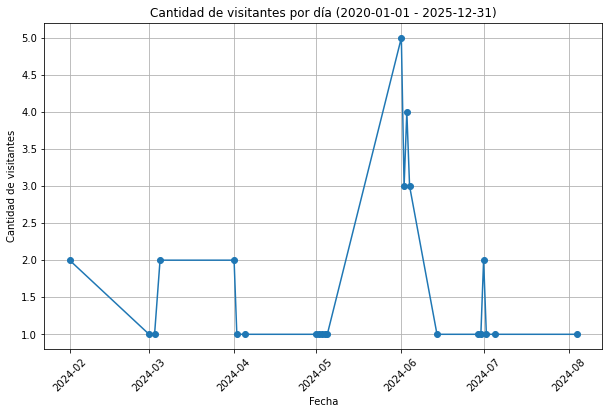

In [7]:
import src.persistence.VisitorRepository as VisitorRepository
import matplotlib.pyplot as plt

# Requerimiento 4.
# Graficar la cantidad de visitantes por periodo de tiempo.


visitor_repository = VisitorRepository.VisitorRepository()

def plot_visitors_by_period(start_date, end_date, periodo='day'):
    # Obtener datos de visitantes por periodo
    df = visitor_repository.get_visitors_by_date_range(start_date, end_date, periodo)
    
    # Configurar el tamaño del gráfico
    plt.figure(figsize=(10, 6))
    
    # Graficar los datos
    plt.plot(df['Fecha'], df['Cantidad_Visitantes'], marker='o')
    
    # Determinar el nombre del periodo
    if periodo == 'day':
        period_name = 'día'
    elif periodo == 'week':
        period_name = 'semana'
    elif periodo == 'month':
        period_name = 'mes'
    elif periodo == 'year':
        period_name = 'año'
    else:
        period_name = 'periodo'

    # Añadir título y etiquetas
    plt.title(f'Cantidad de visitantes por {period_name} ({start_date} - {end_date})')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de visitantes')
    
    # Mostrar el gráfico
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Obtener datos de visitantes por día
display(visitor_repository.get_visitors_by_date_range("2020-01-01", "2025-12-31", "day"))

# Ejemplo de uso
plot_visitors_by_period("2020-01-01", "2025-12-31", "day")


In [ ]:
import src.persistence.ArtefactRepository as ArtefactRepository

# Requerimiento 5.
# Obtiene a los artefactos, juntos a su familia, ordenados por familia y nombre.

artefact_repository = ArtefactRepository.ArtefactRepository()

display(artefact_repository.get_artefacts_ordered_by_family_and_name())


In [14]:
import src.persistence.VisitorRepository as VisitorRepository
import pandas as pd

# Requerimiento 6.
# Calcula el crecimiento de visitantes en porcentaje entre periodos de tiempo.

def visitors_and_growth(start_date, end_date, periodo='month'):
    # Crear instancia del repositorio
    visitor_repository = VisitorRepository.VisitorRepository()
    
    # Obtener datos de visitantes por periodo
    df = visitor_repository.get_visitors_by_date_range(start_date, end_date, periodo)
    
    # Calcular el porcentaje de crecimiento
    growth_percentage = df['Cantidad_Visitantes'].pct_change() * 100
    
    # Crear un nuevo DataFrame con los resultados
    growth_df = pd.DataFrame({
        'Fecha': df['Fecha'].iloc[1:],  # Excluir la primera fila ya que no tiene un periodo anterior para calcular el crecimiento
        'Cantidades_Visitantes': df['Cantidad_Visitantes'].iloc[1:],  # Excluir la primera fila ya que no tiene un periodo anterior para calcular el crecimiento
        'Crecimiento_Porcentaje': growth_percentage.iloc[1:]  # Excluir la primera fila ya que no tiene un periodo anterior para calcular el crecimiento
    })
    
    return growth_df

# Obtener las cantidades de visitantes y el crecimiento en porcentaje por mes
result_df = visitors_and_growth("2020-01-01", "2025-12-31", "month")
display(result_df)




,Fecha,Cantidades_Visitantes,Crecimiento_Porcentaje
1,2024-03,4,100.0
2,2024-04,4,0.0
3,2024-05,4,0.0
4,2024-06,5,25.0
5,2024-07,4,-20.0
6,2024-08,1,-75.0


In [ ]:
import src.persistence.ExpositionRepository as ExpositionRepository

# Requerimiento 7.
# Obtiene a las exposiciones, juntos al total de recorridos realizados en cada una.
# Sin filtros, con intervalo de fechas de inicio.

exposition_repository = ExpositionRepository.ExpositionRepository()

display(exposition_repository.get_expositions_and_total_tours())

fecha_inicio = '2024-05-01 00:00:00'
fecha_termino = '2024-12-31 23:59:59'

display(exposition_repository.get_expositions_and_total_tours_between_dates(fecha_inicio, fecha_termino))

In [ ]:
import src.persistence.VisitorRepository as VisitorRepository

# Requerimiento 8
# Obtiene a los visitantes, ordenados por cantidad de recorridos realizados.

visitor_repository = VisitorRepository.VisitorRepository()

display(visitor_repository.get_visitors_ordered_by_number_of_attendances())

In [ ]:
import src.persistence.ThemeRepository as ThemeRepository

# Requerimiento 9.
# Obtiene a los temas, juntos a las exposiciones que contienen.

theme_repository = ThemeRepository.ThemeRepository()

display(theme_repository.get_themes_and_expositions())

In [ ]:
import src.persistence.ExpositionRepository as ExpositionRepository

# Requrimiento 10.
# Obtiene a las exposiciones, juntos a las empresas que las visitan.

exposition_repository = ExpositionRepository.ExpositionRepository()

display(exposition_repository.get_expositions_and_visiting_companies())